# **Data Loading:**

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

files.upload()

Saving data.yaml to data.yaml
Saving kaggle.json to kaggle.json


{'data.yaml': b'train: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train\r\nval: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/val\r\ntest: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/test\r\n\r\nnc: 1\r\n\r\nnames: \r\n  0: Person\r\n',
 'kaggle.json': b'{"username":"shorya22","key":"82c78c84a75534ae244d62dba0df6cfb"}'}

In [5]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d rgbnihal/c2a-dataset   # Dataset

Dataset URL: https://www.kaggle.com/datasets/rgbnihal/c2a-dataset
License(s): MIT
100% 4.57G/4.57G [04:43<00:00, 17.8MB/s]
100% 4.57G/4.57G [04:43<00:00, 17.3MB/s]


In [8]:
! unzip /content/c2a-dataset.zip -d /content/Human_Detection_In_Disaster

Streaming output truncated to the last 5000 lines.
  inflating: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels/traffic_incident_image0189_1.txt  
  inflating: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels/traffic_incident_image0189_2.txt  
  inflating: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels/traffic_incident_image0189_3.txt  
  inflating: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels/traffic_incident_image0189_4.txt  
  inflating: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels/traffic_incident_image0190_0.txt  
  inflating: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels/traffic_incident_image0190_3.txt  
  inflating: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels/traffic_incident_image0191_0.txt  
  inflating: /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels/

In [10]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 54.0 MB/s eta 0:00:00


# **Model Training:**

In [11]:
from ultralytics import YOLO

In [17]:
model= YOLO("/content/runs/detect/train/weights/last.pt")

In [18]:
train_results= model.train(resume=True,imgsz=800)

Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/last.pt, data=data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/runs/detect/train/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_co

train: Scanning /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/labels.cache... 6129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6129/6129 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/train/images/flood_image0407_3.png: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/val/labels.cache... 2043 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/runs/detect/train/weights/last.pt from epoch 124 to 200 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      7.04G      1.033     0.6783     0.9519        164        800: 100%|██████████| 384/384 [00:45<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.53it/s]


                   all       2043      72123      0.855      0.751      0.815      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      6.25G      1.031     0.6779     0.9507         73        800: 100%|██████████| 384/384 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.97it/s]


                   all       2043      72123      0.856      0.751      0.815      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       8.2G      1.035     0.6816     0.9525         40        800: 100%|██████████| 384/384 [00:45<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.94it/s]


                   all       2043      72123      0.856      0.751      0.815      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      7.25G      1.035     0.6789     0.9514         19        800: 100%|██████████| 384/384 [00:45<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.02it/s]


                   all       2043      72123      0.858      0.751      0.816      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      7.25G      1.026     0.6772     0.9509         29        800: 100%|██████████| 384/384 [00:45<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]


                   all       2043      72123      0.858      0.751      0.816      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      7.63G      1.025     0.6747     0.9469         76        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.13it/s]


                   all       2043      72123      0.858       0.75      0.816      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      7.17G      1.025     0.6748     0.9498         29        800: 100%|██████████| 384/384 [00:45<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]


                   all       2043      72123      0.857      0.751      0.816      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      8.32G      1.028     0.6769     0.9505         55        800: 100%|██████████| 384/384 [00:45<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.82it/s]


                   all       2043      72123      0.858      0.751      0.816      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200       8.3G      1.024      0.674     0.9481         30        800: 100%|██████████| 384/384 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.95it/s]


                   all       2043      72123      0.857      0.751      0.816      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      8.31G      1.024     0.6722     0.9484         19        800: 100%|██████████| 384/384 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.94it/s]


                   all       2043      72123      0.858      0.751      0.816      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      9.71G      1.027     0.6696     0.9482         73        800: 100%|██████████| 384/384 [00:45<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]


                   all       2043      72123      0.858      0.751      0.817      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      8.69G      1.026     0.6747     0.9497         28        800: 100%|██████████| 384/384 [00:45<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.10it/s]


                   all       2043      72123      0.857      0.752      0.817      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      9.47G      1.024     0.6722     0.9489         56        800: 100%|██████████| 384/384 [00:45<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.93it/s]


                   all       2043      72123      0.858      0.752      0.817      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      7.54G      1.021     0.6725     0.9463        109        800: 100%|██████████| 384/384 [00:45<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.10it/s]


                   all       2043      72123      0.858      0.752      0.817      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      8.88G       1.02      0.668     0.9464         23        800: 100%|██████████| 384/384 [00:45<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]


                   all       2043      72123      0.858      0.752      0.817      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      8.42G      1.021     0.6691     0.9453         70        800: 100%|██████████| 384/384 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]


                   all       2043      72123      0.859      0.752      0.817      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      8.93G      1.015     0.6666     0.9451         22        800: 100%|██████████| 384/384 [00:45<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.92it/s]


                   all       2043      72123      0.859      0.752      0.817      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      9.13G      1.012     0.6663     0.9466         33        800: 100%|██████████| 384/384 [00:45<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.95it/s]


                   all       2043      72123       0.86      0.751      0.817      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      7.94G      1.021     0.6689     0.9457         39        800: 100%|██████████| 384/384 [00:45<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.93it/s]


                   all       2043      72123      0.859      0.752      0.817      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      7.54G      1.019     0.6678     0.9469         51        800: 100%|██████████| 384/384 [00:45<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]


                   all       2043      72123      0.858      0.753      0.818      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      7.55G      1.013     0.6615      0.947         22        800: 100%|██████████| 384/384 [00:45<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.15it/s]


                   all       2043      72123      0.857      0.754      0.818      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      7.42G      1.017     0.6653     0.9457         16        800: 100%|██████████| 384/384 [00:45<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.92it/s]


                   all       2043      72123      0.857      0.754      0.818      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      8.99G      1.011     0.6616      0.943        125        800: 100%|██████████| 384/384 [00:45<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]


                   all       2043      72123      0.856      0.755      0.818      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200        10G      1.016     0.6649     0.9454         40        800: 100%|██████████| 384/384 [00:45<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.90it/s]


                   all       2043      72123      0.857      0.754      0.818      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      8.16G      1.011     0.6642      0.945         65        800: 100%|██████████| 384/384 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.98it/s]


                   all       2043      72123      0.857      0.754      0.818      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      8.72G       1.01      0.664     0.9457         70        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.12it/s]


                   all       2043      72123      0.856      0.754      0.818      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      8.75G      1.012     0.6615     0.9447        205        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.13it/s]


                   all       2043      72123      0.856      0.754      0.818      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      10.3G      1.006     0.6579     0.9437         24        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.87it/s]


                   all       2043      72123      0.856      0.755      0.818      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200       8.6G      1.008     0.6587     0.9428         26        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.93it/s]


                   all       2043      72123      0.857      0.755      0.818      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      7.72G      1.004     0.6589     0.9438         36        800: 100%|██████████| 384/384 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.84it/s]


                   all       2043      72123      0.856      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      8.09G       1.01     0.6594     0.9425         28        800: 100%|██████████| 384/384 [00:45<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.90it/s]


                   all       2043      72123      0.857      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      7.86G      1.002     0.6569     0.9418         27        800: 100%|██████████| 384/384 [00:45<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.00it/s]


                   all       2043      72123      0.857      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      8.18G      1.006      0.661     0.9416         30        800: 100%|██████████| 384/384 [00:45<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.06it/s]


                   all       2043      72123      0.858      0.754      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      10.6G      1.002     0.6528     0.9408         41        800: 100%|██████████| 384/384 [00:45<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.98it/s]


                   all       2043      72123      0.858      0.754      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      7.29G      1.003     0.6575     0.9437         21        800: 100%|██████████| 384/384 [00:45<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]


                   all       2043      72123      0.858      0.754      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      9.42G      1.002     0.6519     0.9393         56        800: 100%|██████████| 384/384 [00:44<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.97it/s]


                   all       2043      72123      0.858      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      7.87G      1.006     0.6547     0.9426         37        800: 100%|██████████| 384/384 [00:45<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.97it/s]


                   all       2043      72123      0.858      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200       8.9G      1.001      0.654     0.9408         91        800: 100%|██████████| 384/384 [00:45<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.07it/s]


                   all       2043      72123      0.858      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      7.47G      1.007     0.6561     0.9425         26        800: 100%|██████████| 384/384 [00:45<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.14it/s]


                   all       2043      72123      0.858      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      9.11G     0.9994     0.6548     0.9426         27        800: 100%|██████████| 384/384 [00:45<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.01it/s]


                   all       2043      72123      0.858      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200       8.4G      1.001     0.6565     0.9408         85        800: 100%|██████████| 384/384 [00:45<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.78it/s]


                   all       2043      72123      0.858      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      8.43G     0.9997     0.6512     0.9387         30        800: 100%|██████████| 384/384 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]


                   all       2043      72123      0.858      0.754      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      6.52G     0.9985     0.6514     0.9393         49        800: 100%|██████████| 384/384 [00:44<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.02it/s]


                   all       2043      72123      0.859      0.754      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      11.6G     0.9985     0.6493     0.9393         65        800: 100%|██████████| 384/384 [00:45<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.93it/s]


                   all       2043      72123      0.858      0.754      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      8.88G     0.9958       0.65     0.9392         87        800: 100%|██████████| 384/384 [00:45<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]


                   all       2043      72123      0.859      0.754      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      8.54G      1.001     0.6535     0.9387         96        800: 100%|██████████| 384/384 [00:44<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.08it/s]


                   all       2043      72123      0.859      0.754      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      7.05G     0.9969     0.6515       0.94        113        800: 100%|██████████| 384/384 [00:45<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.84it/s]


                   all       2043      72123      0.858      0.755      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      7.59G     0.9946     0.6477     0.9374         40        800: 100%|██████████| 384/384 [00:45<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.90it/s]


                   all       2043      72123      0.859      0.754      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      9.13G     0.9976     0.6477     0.9366         73        800: 100%|██████████| 384/384 [00:44<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]


                   all       2043      72123      0.859      0.754      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      5.98G     0.9948     0.6491     0.9373         37        800: 100%|██████████| 384/384 [00:44<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.01it/s]


                   all       2043      72123      0.858      0.755      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      7.17G     0.9916     0.6467     0.9383         42        800: 100%|██████████| 384/384 [00:45<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.99it/s]


                   all       2043      72123      0.858      0.755      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200         9G     0.9876     0.6445     0.9377         53        800: 100%|██████████| 384/384 [00:45<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.14it/s]


                   all       2043      72123      0.858      0.755      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      8.15G     0.9913     0.6438     0.9371         21        800: 100%|██████████| 384/384 [00:45<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.02it/s]


                   all       2043      72123      0.858      0.755      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      8.02G     0.9889      0.647     0.9386         12        800: 100%|██████████| 384/384 [00:45<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.78it/s]


                   all       2043      72123      0.858      0.755      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      7.81G     0.9855     0.6406     0.9354         39        800: 100%|██████████| 384/384 [00:45<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.86it/s]


                   all       2043      72123      0.858      0.755      0.818      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      7.51G     0.9856     0.6387     0.9357         89        800: 100%|██████████| 384/384 [00:44<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.99it/s]


                   all       2043      72123      0.858      0.755      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      8.91G     0.9882     0.6407     0.9367         41        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.98it/s]


                   all       2043      72123      0.859      0.754      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      8.02G     0.9872     0.6439     0.9373         40        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.09it/s]


                   all       2043      72123      0.858      0.754      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      8.69G     0.9879     0.6403      0.936         12        800: 100%|██████████| 384/384 [00:45<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]


                   all       2043      72123      0.857      0.755      0.819       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      7.61G     0.9812     0.6373     0.9361         13        800: 100%|██████████| 384/384 [00:45<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.91it/s]


                   all       2043      72123      0.857      0.755      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      7.95G     0.9855     0.6399     0.9376         22        800: 100%|██████████| 384/384 [00:44<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.99it/s]


                   all       2043      72123      0.856      0.756      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      10.9G     0.9832     0.6351     0.9351         71        800: 100%|██████████| 384/384 [00:45<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.90it/s]


                   all       2043      72123      0.856      0.756      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      7.51G     0.9882     0.6372     0.9356         19        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]


                   all       2043      72123      0.856      0.755      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      6.64G     0.9806     0.6368      0.935         22        800: 100%|██████████| 384/384 [00:45<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.08it/s]


                   all       2043      72123      0.855      0.756      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      8.18G     0.9846     0.6371     0.9347        139        800: 100%|██████████| 384/384 [00:45<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.00it/s]


                   all       2043      72123      0.856      0.755      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      7.82G     0.9823     0.6361     0.9341         18        800: 100%|██████████| 384/384 [00:45<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.85it/s]


                   all       2043      72123      0.856      0.755      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      8.15G     0.9844     0.6365     0.9355         26        800: 100%|██████████| 384/384 [00:45<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.92it/s]


                   all       2043      72123      0.856      0.755      0.818       0.56
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      6.69G     0.9828     0.6408      0.943         39        800: 100%|██████████| 384/384 [00:46<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.99it/s]


                   all       2043      72123      0.856      0.755      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      6.44G     0.9765     0.6352     0.9415         40        800: 100%|██████████| 384/384 [00:43<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.03it/s]


                   all       2043      72123      0.857      0.755      0.818       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      6.85G     0.9731     0.6337     0.9412         46        800: 100%|██████████| 384/384 [00:43<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.00it/s]


                   all       2043      72123      0.856      0.756      0.818      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       6.9G     0.9723     0.6302     0.9394         29        800: 100%|██████████| 384/384 [00:43<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  6.02it/s]


                   all       2043      72123      0.856      0.756      0.818      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      6.32G     0.9711     0.6316       0.94         22        800: 100%|██████████| 384/384 [00:43<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.88it/s]


                   all       2043      72123      0.856      0.756      0.818      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      6.53G     0.9708     0.6288     0.9401         19        800: 100%|██████████| 384/384 [00:43<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.94it/s]


                   all       2043      72123      0.856      0.756      0.818      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      5.97G     0.9752     0.6324     0.9398         38        800: 100%|██████████| 384/384 [00:43<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.95it/s]


                   all       2043      72123      0.856      0.757      0.818      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      6.66G     0.9666     0.6282     0.9398         27        800: 100%|██████████| 384/384 [00:43<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:11<00:00,  5.76it/s]


                   all       2043      72123      0.856      0.756      0.819      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      6.77G     0.9675     0.6277     0.9387         31        800: 100%|██████████| 384/384 [00:43<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.94it/s]


                   all       2043      72123      0.856      0.756      0.818      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      6.59G      0.968     0.6278     0.9386         27        800: 100%|██████████| 384/384 [00:43<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:10<00:00,  5.85it/s]


                   all       2043      72123      0.856      0.756      0.819      0.562

77 epochs completed in 1.216 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:25<00:00,  2.54it/s]


                   all       2043      72123      0.856      0.757      0.819      0.562
Speed: 0.2ms preprocess, 0.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


# **Model Evaluation:**

In [19]:
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom model

In [20]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered


Ultralytics YOLOv8.2.98 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/Human_Detection_In_Disaster/C2A_Dataset/new_dataset3/val/labels.cache... 2043 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:26<00:00,  4.74it/s]


                   all       2043      72123      0.856      0.759       0.82      0.569
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val


# **Real Time Human Detection In Disaster:**

In [ ]:
import cv2
from PIL import Image
from ultralytics import YOLO

In [ ]:
# Load a pretrained YOLOv8n model
model = YOLO(r'D:\Computer Vision & Projects\Human Detection In Disaster\Human Detection.pt')

cap = cv2.VideoCapture(0)
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if not ret:
        break

    frame= cv2.resize(frame,(600,500))

    # flip the image
    # frame = cv2.flip(frame, -1)

    # Run inference on the current frame
    results = model(frame,conf=0.40)  # results list

    for r in results:
        frame = r.plot()

    # Display the resulting frame
    cv2.imshow('frame', frame)

    # Press 'q' on keyboard to  exit
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

# After the loop release the cap object and destroy all windows
cap.release()
cv2.destroyAllWindows()

# **Model Inferencing Through Image:**

In [ ]:
# Load a pretrained YOLOv8n model
model = YOLO(r'D:\Computer Vision & Projects\Human Detection In Disaster\Human Detection.pt')

images= [r"C:\Users\Shorya Sharma\Downloads\e7b93690-89f0-4e9c-9765-b91a01dea939.png",
         r"C:\Users\Shorya Sharma\Downloads\707a8fd4-b7f9-4d3c-850e-c45705255d1b.png",
         r"C:\Users\Shorya Sharma\Downloads\4e7af6f4-f714-4aac-8b3f-2eceeb57b427.png",
         r"C:\Users\Shorya Sharma\Downloads\088d4035-3169-471a-a439-da07996cc67e.png",
         r"C:\Users\Shorya Sharma\Downloads\collapsed_building_image0001_3.png"]

c= 0

for img in images:

    # Load an image file
    img = cv2.imread(img)  # replace with your image path

    # Resize the image (optional)
    img = cv2.resize(img, (600, 500))


    # Run inference on the image
    results = model(img, conf=0.50)  # results list

    # Plot the results on the image
    for r in results:
        img = r.plot()

    # Display the resulting image
    cv2.imshow('image', img)
    cv2.imwrite(f"pred{c}.jpg",img)

    c= c+1

    # Press 'q' on keyboard to exit
    if cv2.waitKey(0) & 0xFF == ord('q'):
        cv2.destroyAllWindows()

# **Some Tested Results:**

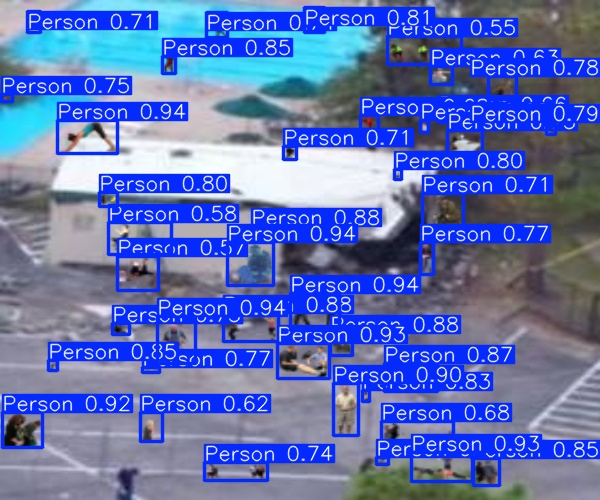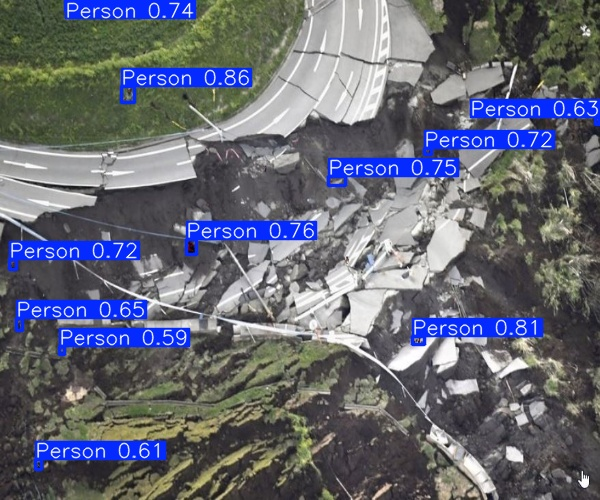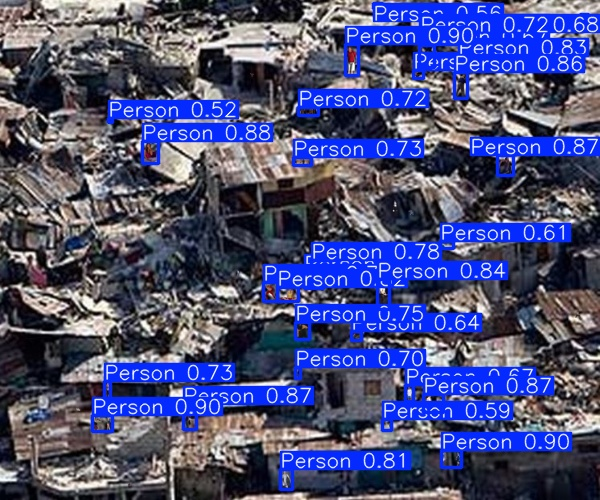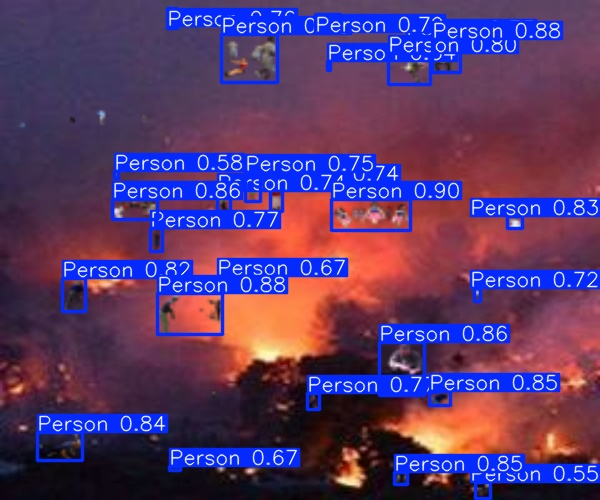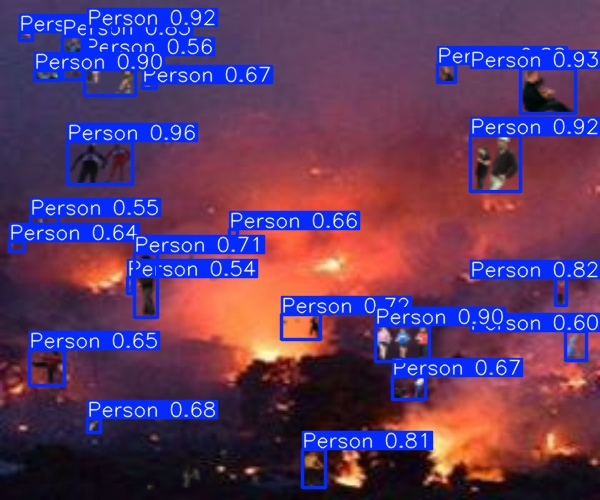